## Import necessary packages

In [72]:
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import hypertools as hyp
%matplotlib inline
sns.set_context('poster')

## Read in data

In [14]:
data = pd.read_excel('GSS 3.xlsx', sheetname='Data')

In [60]:
data.head()

,What is your view on politics in us & world,Ballot used for interview,Year of birth,Household type,Number in family of r,Rs income in constant $,Family income in constant $,Rs job is useful to society,R has opportunity to advance,Rs income is high,...,Spend evening with friends,Spend evening with relatives,Confidence in congress,Confid. in united states supreme court,Confid. in exec branch of fed govt,Confidence in education,Confidence in major companies,Can people be trusted,Is life exciting or dull,Gss year for this respondent
0,Policies in america depend more on who is in g...,Ballot a,1969,"2adlts,mar,1+kids",1st person,164382.03756,131676.6906,No issp,No issp,No issp,...,Sev times a year,Almost daily,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Routine,2016.0
1,Policies in america depend on what is happenin...,Ballot b,1955,"1adlt,0kids",1st person,25740.00000,25740.0000,No issp,No issp,No issp,...,Sev times a year,Sev times a year,Hardly any,A great deal,Only some,Hardly any,Hardly any,Depends,Not applicable,2016.0
2,Not applicable,Ballot c,1944,"2adlts,mar,0kids",1st person,0.00000,38610.0000,No issp,No issp,No issp,...,Not applicable,Not applicable,Hardly any,A great deal,Hardly any,Only some,Only some,Can trust,Exciting,2016.0
3,Policies in america depend more on who is in g...,Ballot a,1973,"4+adlts,2mar,1+kids",2nd person,5265.00000,131676.6906,No issp,No issp,No issp,...,Sev times a week,Sev times a week,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Exciting,2016.0
4,Not applicable,Ballot c,1961,"3adlts,2mar,sp,rel,0kids",2nd person,936.00000,131676.6906,Strongly agree,Disagree,Strongly disagree,...,Not applicable,Not applicable,Hardly any,A great deal,Only some,Only some,A great deal,Can trust,Routine,2016.0


## Create new data frame only looking at happiness, work, and demographic factors

In [63]:
#list of happiness factors
happiness = ['Standard of living of r will improve', 
             'How much time felt sad in past wk', 
             'How much time felt happy in past wk',
             'How much time felt depressed in past wk',
             'I am meeting my current goals',
             'I see myself as successful',
             'I expect more good things to happen to me than bad',
             'I\'m always optimistic about my future',
             'Happiness of marriage',
             'General happiness',
             'Happiness of relt with partner',
             'Condition of health',
             'Satisfaction with financial situation',
             'Rs self ranking of social position',
             'Is life exciting or dull']

#list of work factors
work = ['Rs income in constant $',
        'Rs job is useful to society',
        'R has opportunity to advance',
        'Rs income is high',
        'Rs job is secure',
        'The highest degree r have earned',
        'Respondents income',
        'Rs living standard compared to parents',
        'Respondents income',
        'Living with parents when 16 yrs old',
        'Marital status',
        'Number of hours usually work a week',
        'Job or housework',
        'Is r likely to lose job']

#list of demographic factors
demo = ['Ballot used for interview', 
        'Gss year for this respondent                       ',
        'Year of birth',
        'Region of interview',
        'Was r born in this country',
        'Respondent id number']

In [64]:
happiness_df = data[demo + happiness]
work_df = data[demo + work]
happiness_work_df = data[demo + happiness + work]

In [66]:
happiness_df.head()

,Ballot used for interview,Gss year for this respondent,Year of birth,Region of interview,Was r born in this country,Respondent id number,Standard of living of r will improve,How much time felt sad in past wk,How much time felt happy in past wk,How much time felt depressed in past wk,...,I see myself as successful,I expect more good things to happen to me than bad,I'm always optimistic about my future,Happiness of marriage,General happiness,Happiness of relt with partner,Condition of health,Satisfaction with financial situation,Rs self ranking of social position,Is life exciting or dull
0,Ballot a,2016.0,1969,New england,Yes,1.0,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Very happy,Pretty happy,Not applicable,Good,Satisfied,Top,Routine
1,Ballot b,2016.0,1955,New england,Yes,2.0,Disagree,Not applicable,Not applicable,Not applicable,...,Slightly true,Agree,Agree,Not applicable,Pretty happy,Not applicable,Not applicable,Not at all sat,5,Not applicable
2,Ballot c,2016.0,1944,New england,Yes,3.0,Agree,None or almost none of the time,Most of the time,None or almost none of the time,...,Mostly true,Neutral,Neutral,Very happy,Very happy,Not applicable,Good,More or less,4,Exciting
3,Ballot a,2016.0,1973,New england,Yes,4.0,Not applicable,Not applicable,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Very happy,Pretty happy,Not applicable,Good,Satisfied,3,Exciting
4,Ballot c,2016.0,1961,New england,Yes,5.0,Neither,Some of the time,Most of the time,None or almost none of the time,...,Somewhat true,Agree,Agree,Very happy,Very happy,Not applicable,Excellent,Satisfied,3,Routine


In [75]:
happiness_df.isnull().values.any()

True

## Is happiness data clustered in any way?

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:26: RuntimeWarning: invalid value encountered in true_divide
  return (X - self.means) / self.stds
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


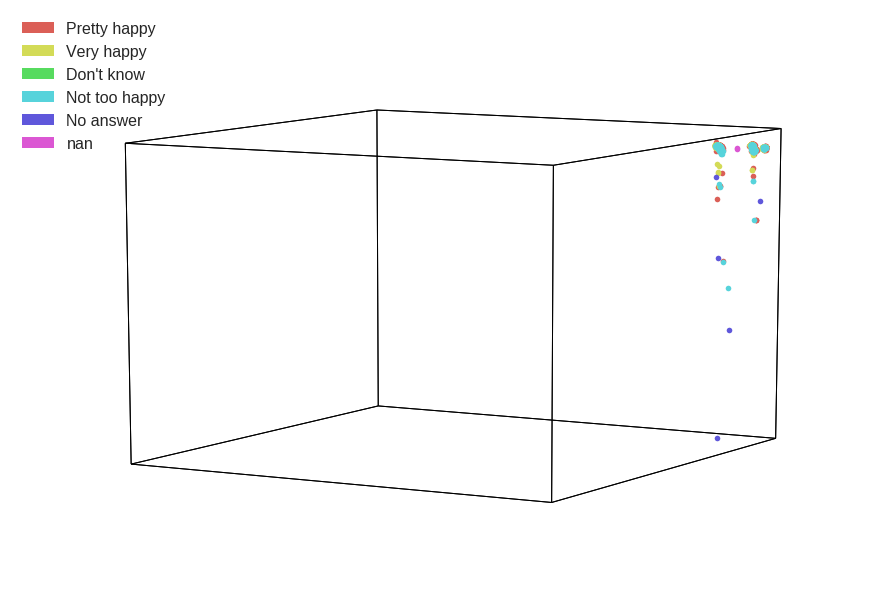

(<matplotlib.figure.Figure at 0x7fc92d4cbc50>,
 [array([[  2.01600000e+03,   1.00000000e+00,   1.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
         [  2.01600000e+03,   2.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [  2.01600000e+03,   3.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         ..., 
         [  2.01600000e+03,   2.86700000e+03,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
         [             nan,              nan,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [             nan,              nan,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])],
 None)

In [73]:
hyp.plot(happiness_df, '.', group = happiness_df['General happiness'], legend = list(happiness_df['General happiness'].unique()))

Standard of living of r will improve


/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:26: RuntimeWarning: invalid value encountered in true_divide
  return (X - self.means) / self.stds
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


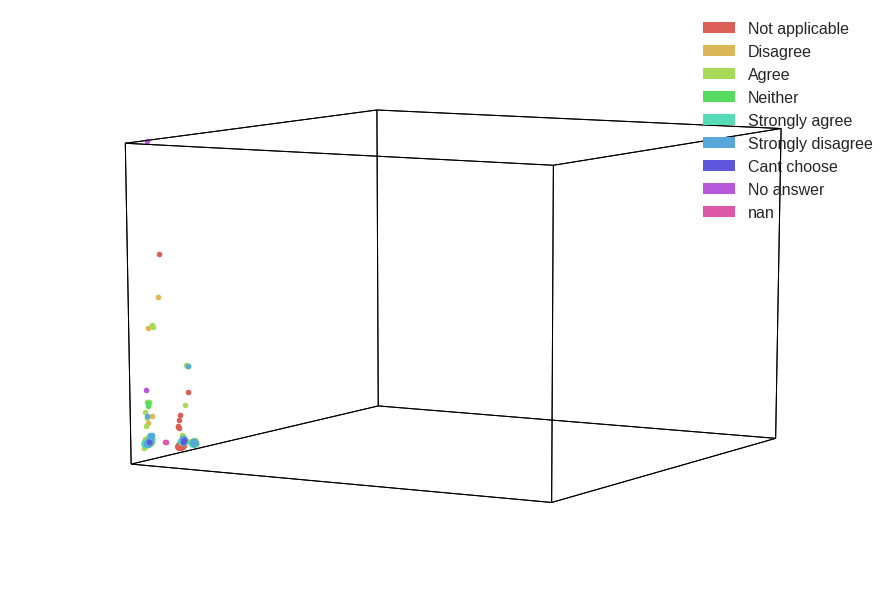

How much time felt sad in past wk


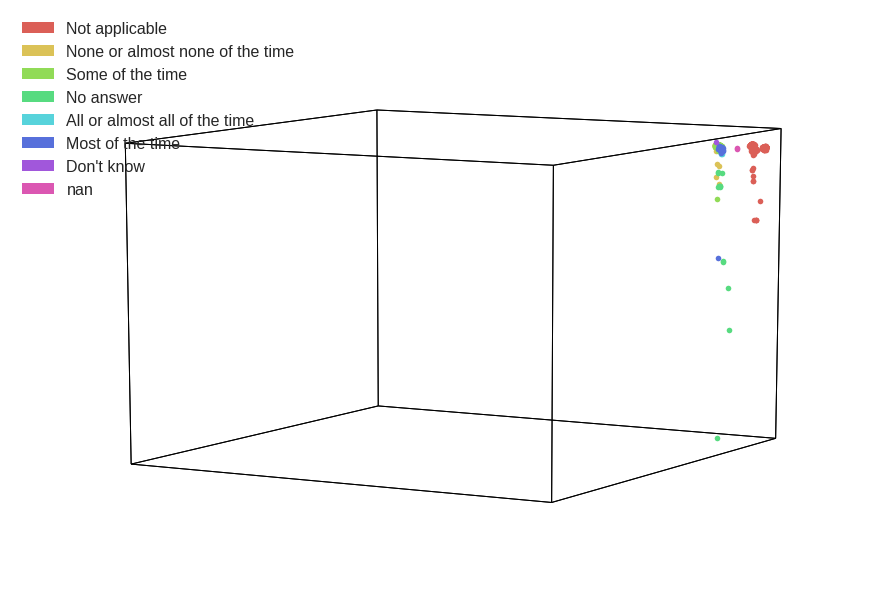

How much time felt happy in past wk


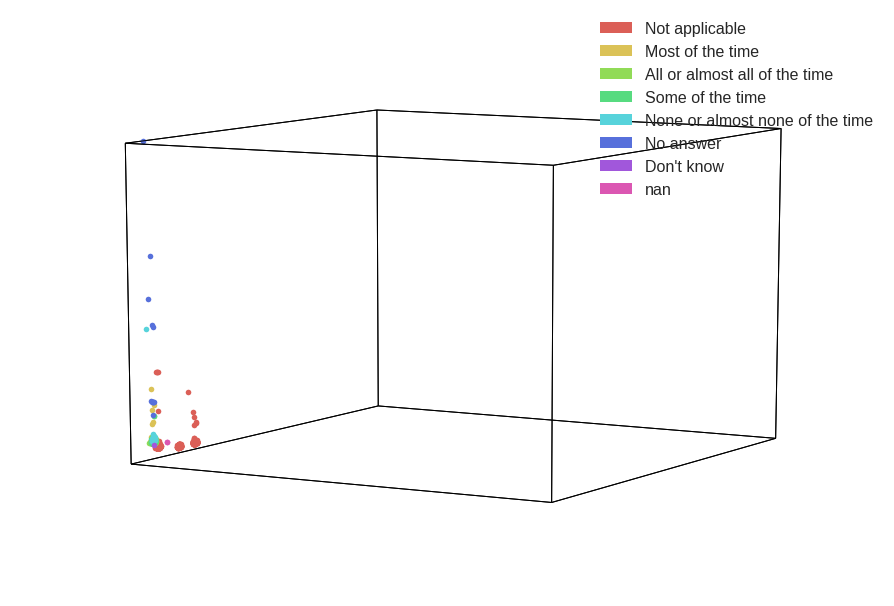

How much time felt depressed in past wk


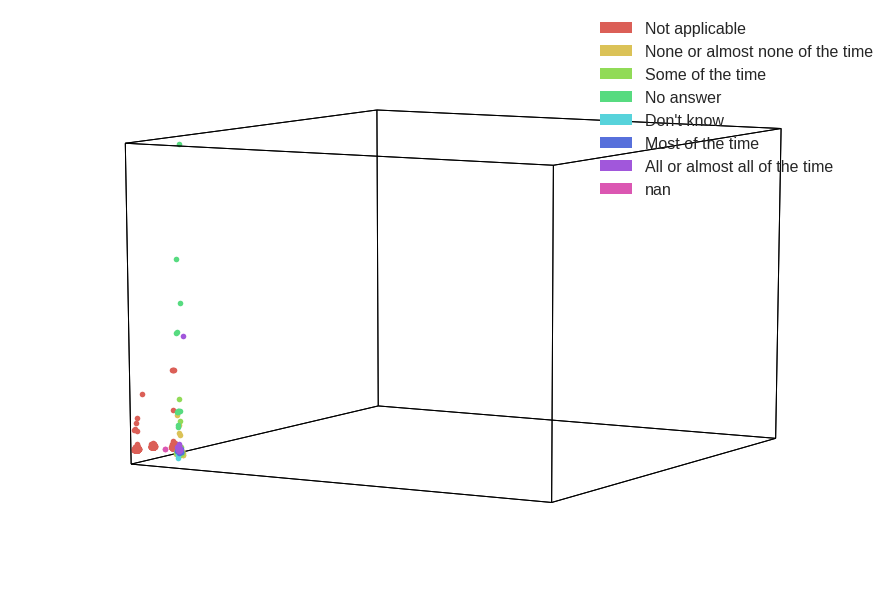

I am meeting my current goals


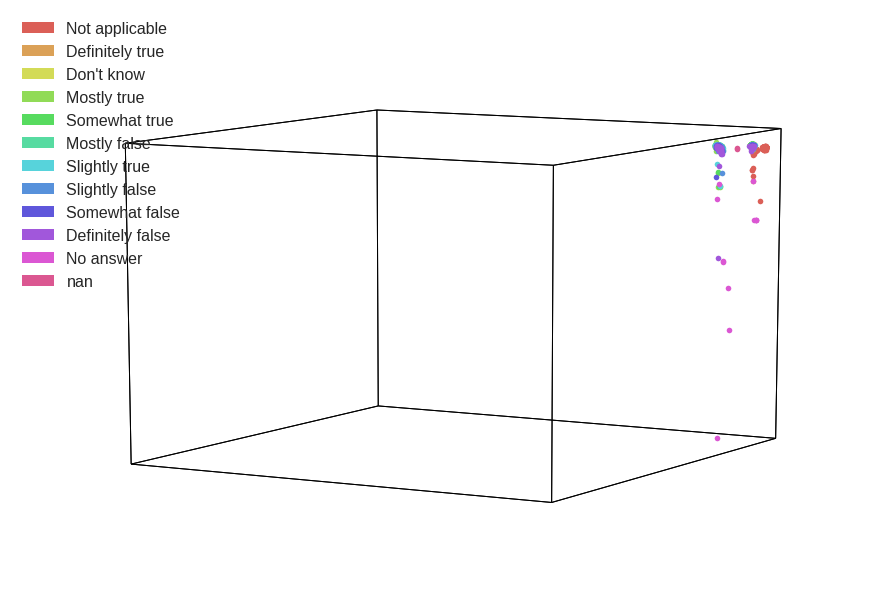

I see myself as successful


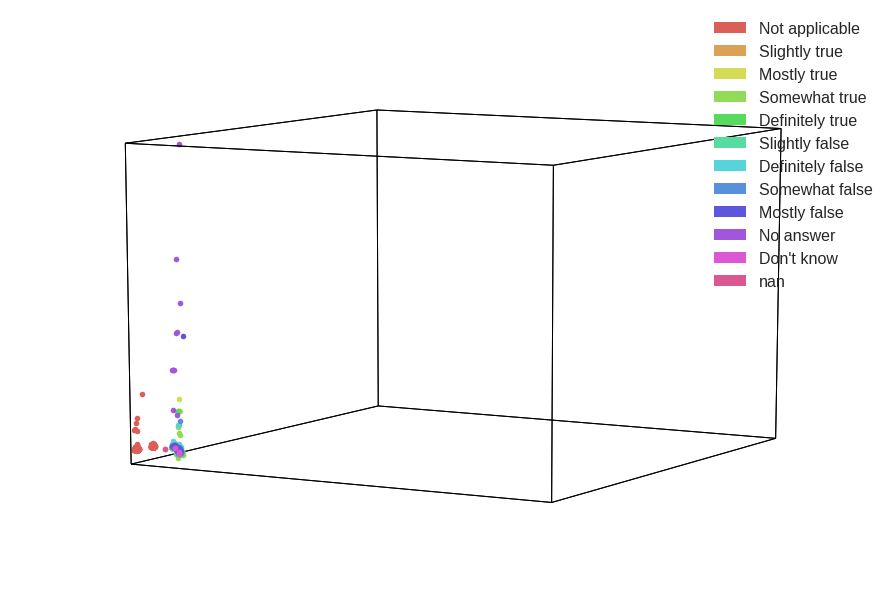

I expect more good things to happen to me than bad


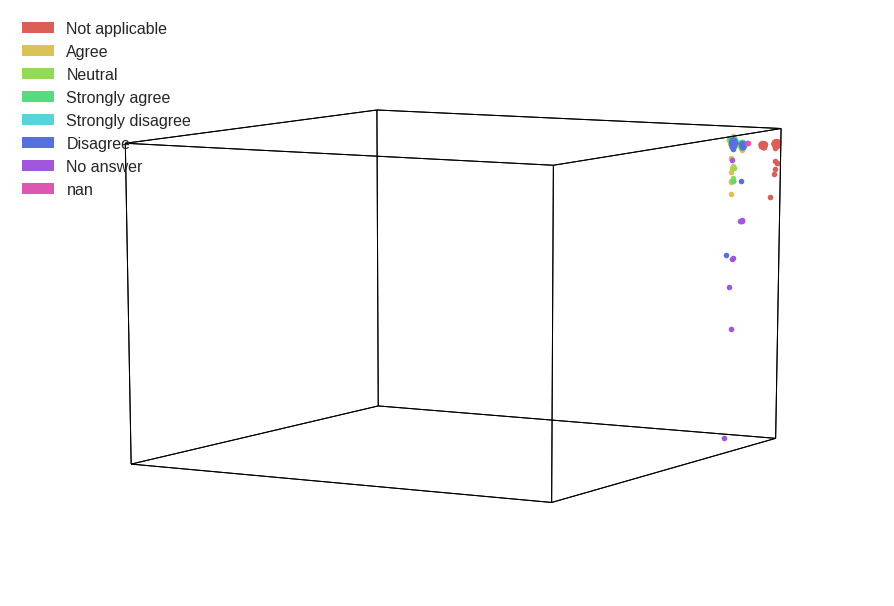

I'm always optimistic about my future


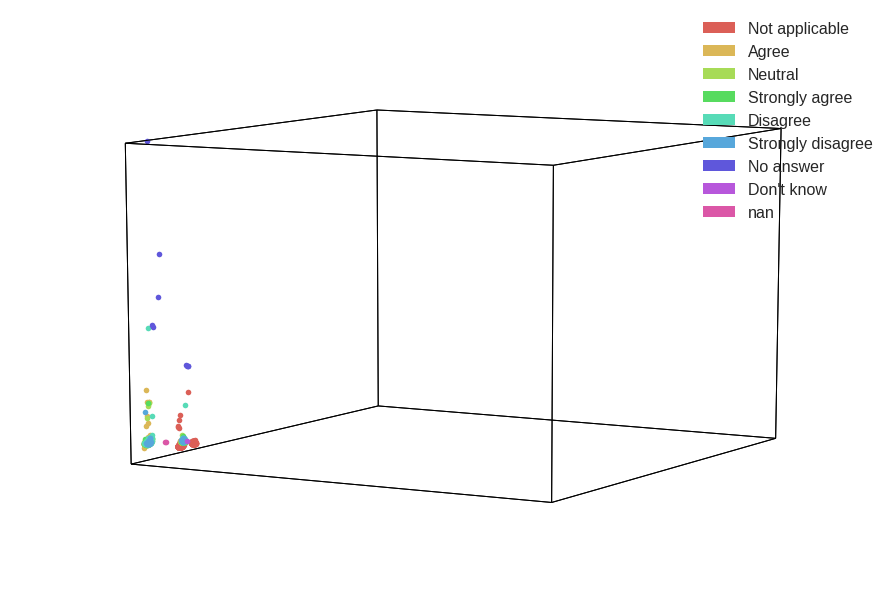

Happiness of marriage


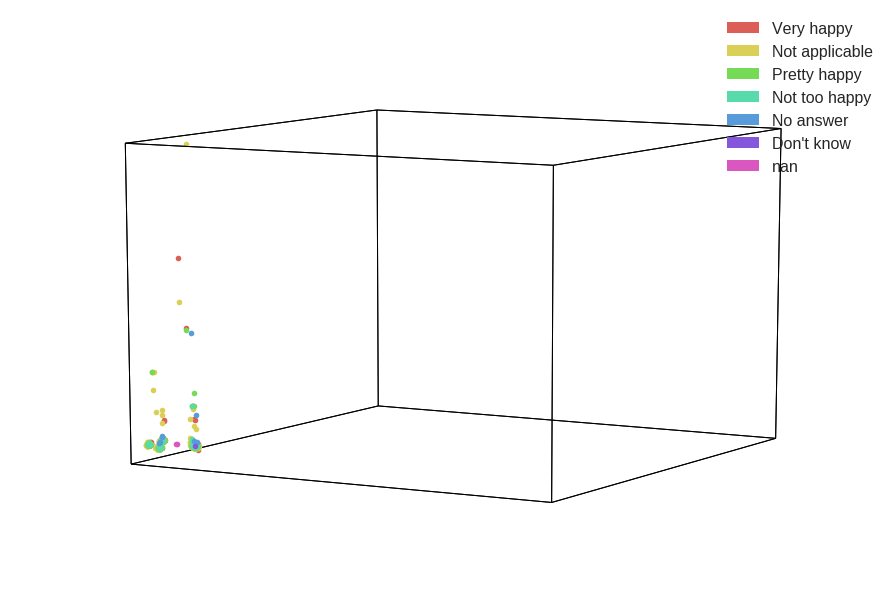

General happiness


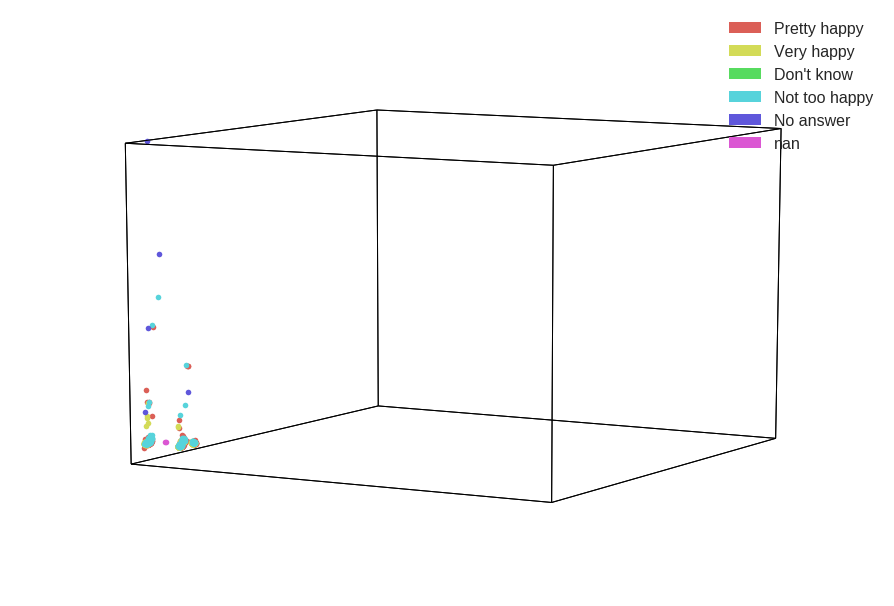

Happiness of relt with partner


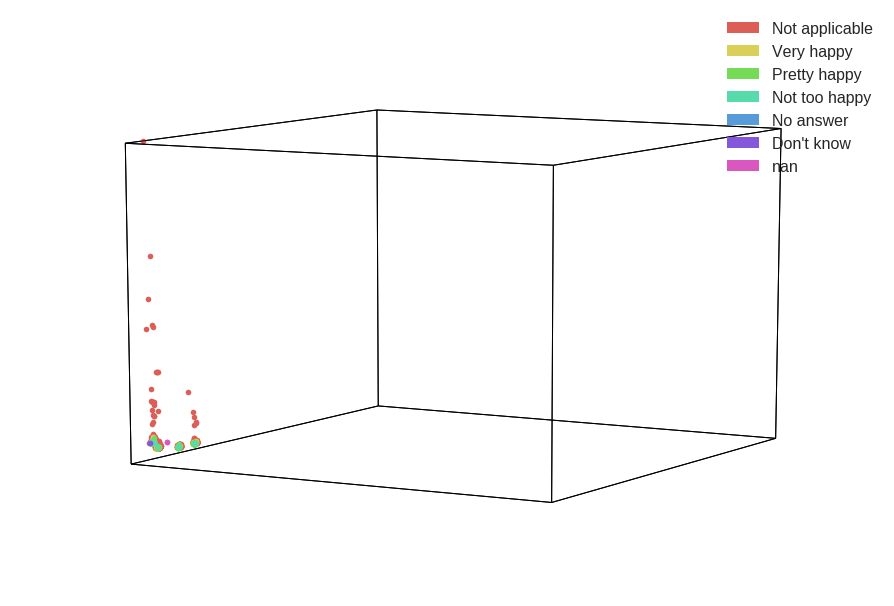

Condition of health


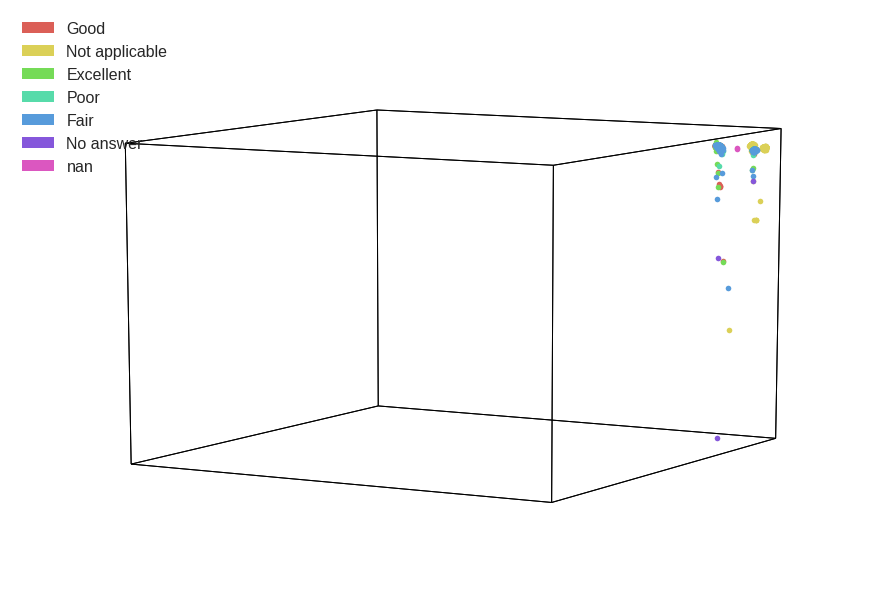

Satisfaction with financial situation


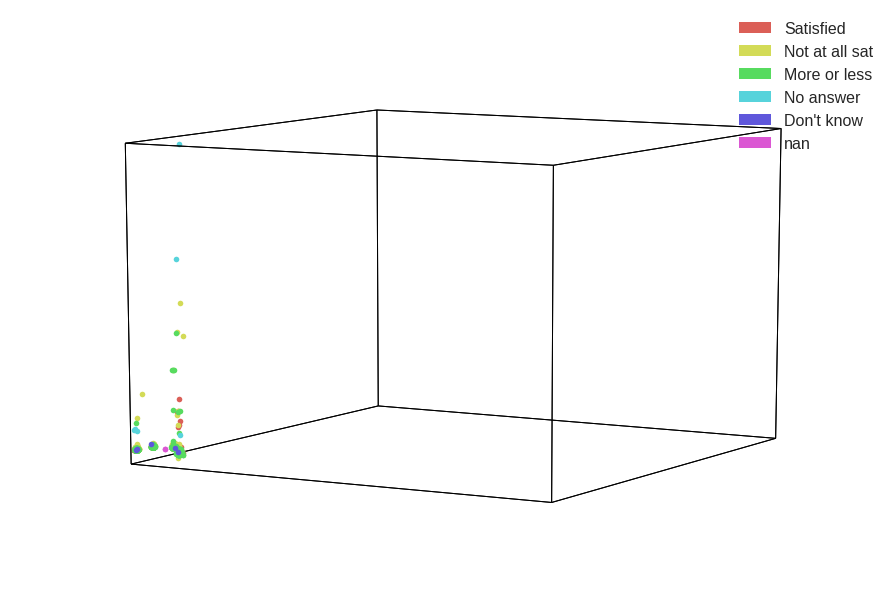

Rs self ranking of social position


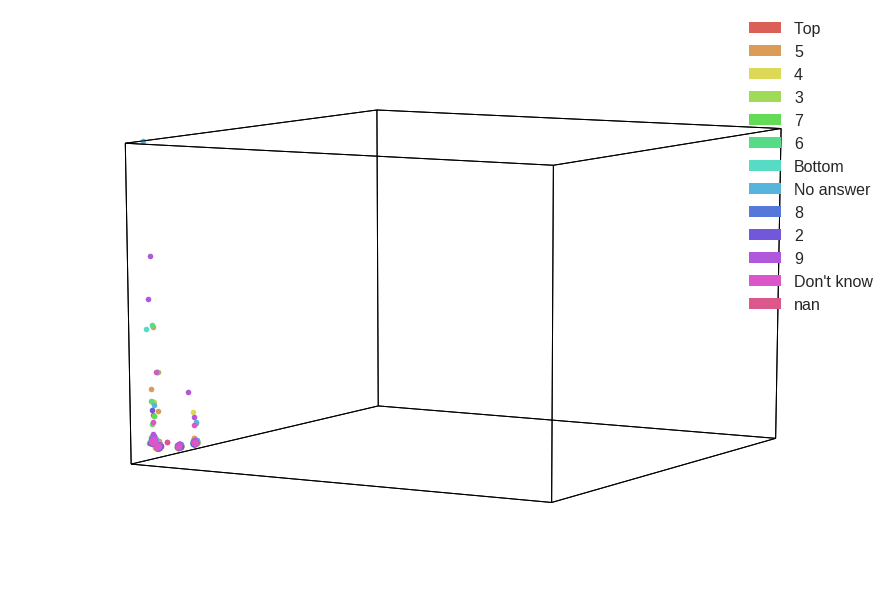

Is life exciting or dull


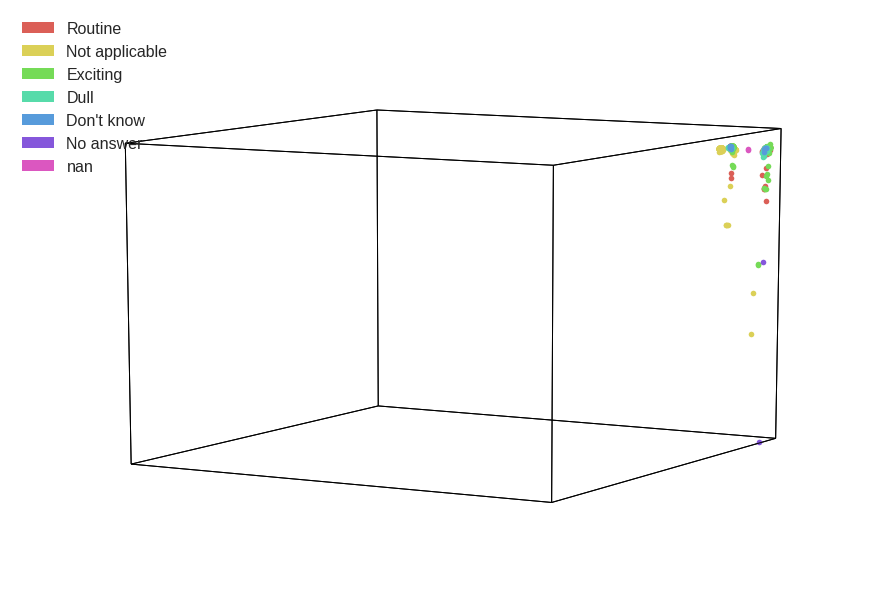

In [74]:
for factor in happiness:
    print(factor)
    hyp.plot(happiness_df, '.', group=happiness_df[factor], legend = list(happiness_df[factor].unique()))